로지스틱 회귀로 와인분류

In [8]:
import pandas as pd
import numpy as np
wine=pd.read_csv('https://bit.ly/wine_csv_data')
#와인데이터 불러오기

In [2]:
wine.head()#와인 앞의 5가지 출력

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()#결측치를 확인하는데 도움을 준다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [13]:
wine.describe()#와인의 통계적인 값들을 보여준다.

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
wine_input=wine[['alcohol','sugar','pH']].to_numpy()
wine_target=wine['class'].to_numpy()
#데이터 준비

In [10]:
from sklearn.model_selection import train_test_split
train_input,test_iput,train_target,test_target=train_test_split(wine_input,wine_target,random_state=42)
#데이터 나누기

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_iput)
#데이터 전처리

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target)," ",lr.score(test_scaled,test_target))
#로지스틱 회귀

0.7850985221674877   0.7655384615384615


결정트리

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target)," ",dt.score(test_scaled,test_target))
#결정 트리 학습

0.8499589490968801   0.8363076923076923


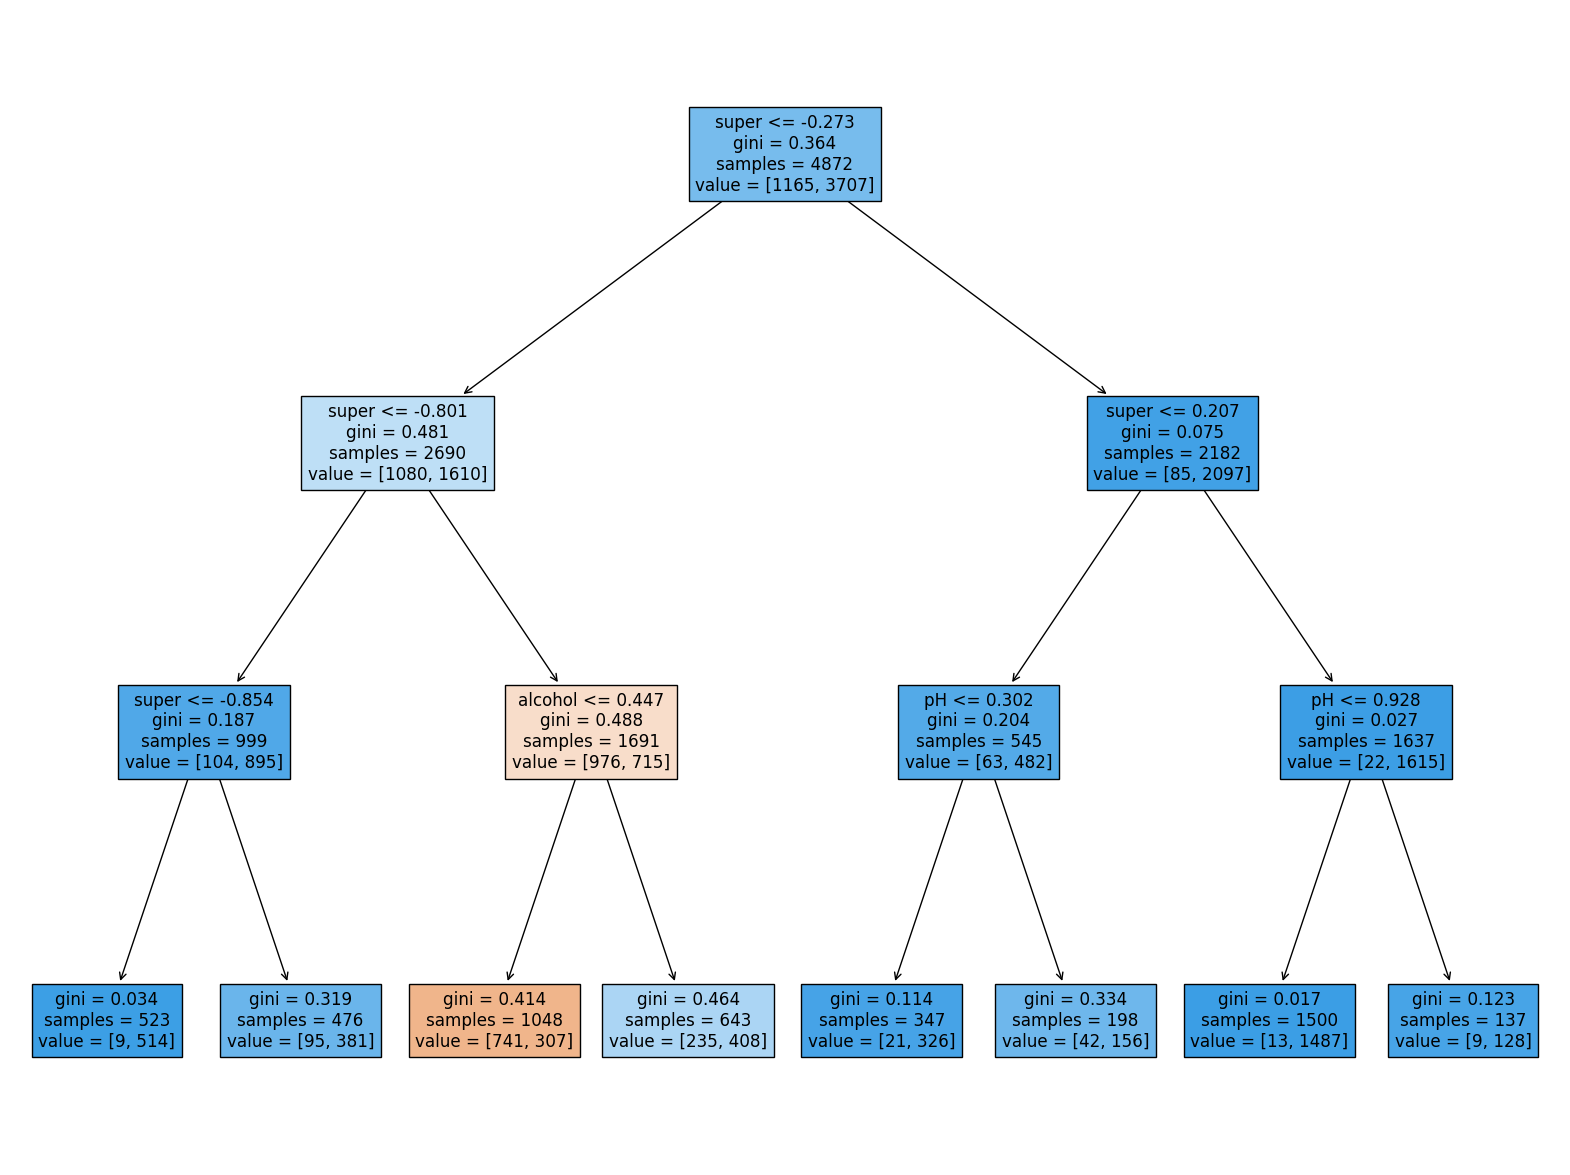

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol','super','pH'])
plt.show()
#결정트리 그래프로 나타내기

In [16]:
print(dt.feature_importances_)
#뭐가 가장 유용했는지 나타냄 1인덱스는 설탕을 나타냄으로 설탕이 가장 유용함

[0.12871631 0.86213285 0.00915084]
